# !git fetch --all
# !git reset --hard origin/main
!git pull

# Diffie Hellman (Discrete Logarithm Problem)

- One of the earliest public-key algorithms
- Involves a shared secret between two parties, normally Alice and Bob

## Prime Number and Primitive Root

The first step is to initialise our public primitive root and public prime number

We adjust the length of the public prime number following the NIST recommendation below

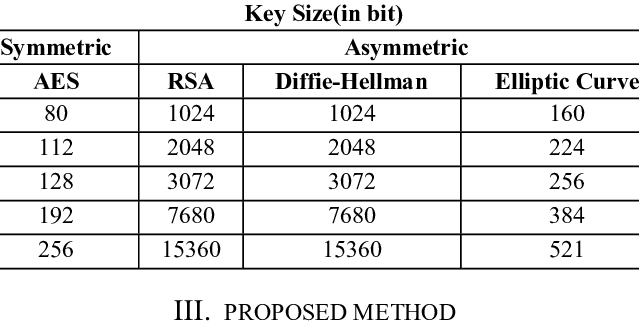
*Amir, Amiruddin & Sari, Riri. (2015). Selecting key generating elliptic curves for Privacy Preserving Association Rule Mining (PPARM). 10.1109/APWiMob.2015.7374930.*

We will utilise openssl to generate the prime number: `openssl prime -generate -bits 1024`
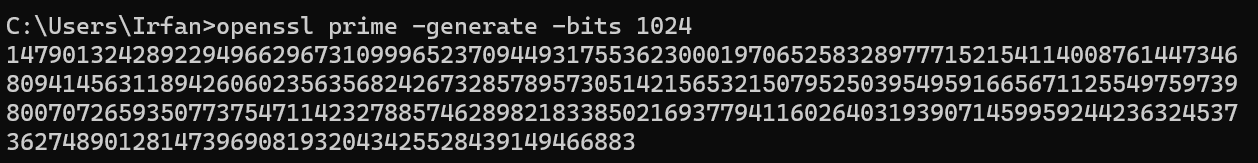

In [1]:
import random
from math import gcd
import time
import math
import matplotlib.pyplot as plt
import subprocess

# Public prime number (Just to serve as PoC for DFKC and DLP)
## 24 bit prime results in

Public_Prime =14814703

In [2]:

# Adapted from https://www.geeksforgeeks.org/find-the-number-of-primitive-roots-modulo-prime/
# Function to return the smallest primitive roots modulo p

def findSmallestPrimitiveRoot(p):
    Start_Time = time.time()
    if p == 2:
        return 1  # Special case for p=2
    for i in range(2, p):
        if gcd(i, p) == 1:
            is_primitive = True
            for j in range(2, p - 1):
                if pow(i, j, p) == 1:
                    is_primitive = False
                    break
            if is_primitive:
                Ending_Time = time.time()
                Running_Time = Ending_Time - Start_Time
                print(f"The running time to find the Smallest Primitive Root of the Prime number is: {Running_Time}")
                return i
 
Public_Root = findSmallestPrimitiveRoot(Public_Prime)

print(f"Prime Number is {Public_Prime}")
print(f"Primitive root is {Public_Root}")


The running time to find the Smallest Primitive Root of the Prime number is: 41.145262718200684
Prime Number is 14814703
Primitive root is 3


## Private Keys

In [3]:
# a: Alice's private key (Trying 24bits but you can try larger values)
a = random.getrandbits(24)
print(f"Alice's private key is {a}")

#b: Bob's private key
b = random.getrandbits(24)
print(f"Bob's private key is {b}")

Alice's private key is 8504742
Bob's private key is 10434480


## Public Keys

In [4]:
# Utilise pow(base, exponent, modulus) function

# A: Alice's public key
A = pow(Public_Root,a,Public_Prime)
print(f"Alice's public key is {A}")

# B: Bob's public key
B = pow(Public_Root,b,Public_Prime)
print(f"Bob's public key is {B}")

Alice's public key is 11470186
Bob's public key is 12904742


## Key Exchange

In [5]:
# Alice calculates the shared key
sa = pow(B, a, Public_Prime)

# Bob calculates the shared key
sb = pow(A, b, Public_Prime)

# check if shared keys are same
if sa == sb:
    print(f"Alice's shared key: {sa}")
    print(f"Bob's shared key: {sb}")
    print("Keys are the same, Hence showing that DFKC is working properly")
else:
    print("Keys are mismatched")

Alice's shared key: 2505240
Bob's shared key: 2505240
Keys are the same, Hence showing that DFKC is working properly


## Methods to solve Discrete Logarithm Problem

In [6]:
import time
#Both Functions are solving for X where X is the private Key 

def brute_force(g, A, p):
    Start_Time = time.time()
    x = 0
    while True:
        if pow(g, x, p) == A:
            Ending_Time = time.time()
            Running_Time = Ending_Time - Start_Time
            return x, Running_Time
        x += 1

# refering to https://www.youtube.com/watch?v=FvInAqxzjsM

def bebe_step_gia_step(g, A, p):
    st = time.time()
    N = int(math.ceil(math.sqrt(p-1)))
    t = {}
    
    #Baby step
    for i in range(N):
        t[pow(g, i, p)] = i
        
    #Fermat's little theorem
    c = pow(g, N * (p-2), p)
    
    for j in range(N):
        y = (A * pow(c, j, p)) % p
        if y in t:
            et = time.time()
            running_time = et - st
            return j * N + t[y], running_time
        
    et = time.time()
    running_time = et - st   
    return None, running_time


In [7]:
# Solve the discrete logarithm problem using brute force
Alice_Private_brute, Running_Time_bruteforce = brute_force(Public_Root, A, Public_Prime)
print(f"Brute Force: Alice's Private key (a) is {Alice_Private_brute}, Time taken: {Running_Time_bruteforce} seconds")

# Solve the discrete logarithm problem using baby-step giant-step
Alice_Private_baby_step, Running_Time_baby_step = bebe_step_gia_step(Public_Root, A, Public_Prime)
print(f"Babystep Giantstep: Alice's Private key (a) is {Alice_Private_baby_step}, Time taken: {Running_Time_baby_step} seconds")

print(f"Actual value of Alice's Private key (a) is {a}")


Brute Force: Alice's Private key (a) is 8504742, Time taken: 15.967031478881836 seconds
Babystep Giantstep: Alice's Private key (a) is 8504742, Time taken: 0.007735490798950195 seconds
Actual value of Alice's Private key (a) is 8504742


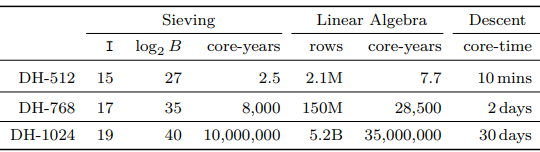
*Excerpt from Imperfect Forward Secrecy: How Diffie Hellman Fails in Practice*

Despite advanced methods to solve diffie hellman, it still takes more than a year for the pre-computation to solve discrete logarithm problems of bit-size 512 and above

We now see that for 1024 Bit prime Number, it takes very long, even with a more efficient alogrithm like the Baby Step Giant Step method. This makes us wonder how strongly related the Prime number length against the time taken in order to solve it. To investigate this we will generate 4 more pairs of prime and its primitive roots, Solve their respective DLP and plot a grpah to see its relationship

# Part 2 of the project

In [8]:
# This is a script to get Prime numbers via open ssl from 2-x bits via python

def generate_primes(bits_range):
    prime_numbers = []
    for bits in range(2, bits_range+1):
        command = f"openssl prime -generate -bits {bits}"
        result = subprocess.check_output(command, shell=True, text=True)
        prime_numbers.append(int(result))
    return prime_numbers


In [12]:
# We are doing from 2-28 Bits hence the max bit number is 28

max_bit_number = 28  # Range of bits for prime generation
Prime_List = generate_primes(max_bit_number)


Primitive_Roots = []

# This will get all the Primitive roots of our prime numbers
for i in range(len(Prime_List)):
    print(f"Calculating Primitive Roots for {i+2}-bit length.")
    Smallest_Primitive = findSmallestPrimitiveRoot(Prime_List[i])
    Primitive_Roots.append(Smallest_Primitive)

Bit_Length = list(range(2, 29))
count = 0
Alice_Private_Keys = []
Alice_Public_Keys = []
# This will get all the Public and private keys of ALice for the respective bit lengths
for i in Bit_Length:
    print(f"Calculating Alice's Private and Public Key for {i+2}-bit length.")
    a = random.getrandbits(i)
    A = pow(Primitive_Roots[count],a,Prime_List[count])
    Alice_Private_Keys.append(a)
    Alice_Public_Keys.append(A)
    count+=1

    
    

    


Calculating Primitive Roots for 2-bit length.
The running time to find the Smallest Primitive Root of the Prime number is: 0.0
Calculating Primitive Roots for 3-bit length.
The running time to find the Smallest Primitive Root of the Prime number is: 0.0
Calculating Primitive Roots for 4-bit length.
The running time to find the Smallest Primitive Root of the Prime number is: 0.0
Calculating Primitive Roots for 5-bit length.
The running time to find the Smallest Primitive Root of the Prime number is: 0.0
Calculating Primitive Roots for 6-bit length.
The running time to find the Smallest Primitive Root of the Prime number is: 0.0
Calculating Primitive Roots for 7-bit length.
The running time to find the Smallest Primitive Root of the Prime number is: 0.0
Calculating Primitive Roots for 8-bit length.
The running time to find the Smallest Primitive Root of the Prime number is: 0.0
Calculating Primitive Roots for 9-bit length.
The running time to find the Smallest Primitive Root of the Prime

Solving the DLP for all the Bitlengths

In [13]:
Running_Time_bruteforce_list = []
Running_Time_baby_step_list = []
for i in range(len(Prime_List)):
    # Solve the discrete logarithm problem using brute force
    Alice_Private_brute, Running_Time_bruteforce = brute_force(Primitive_Roots[i], Alice_Public_Keys[i], Prime_List[i])
    print(f"Brute Force for Bit Length {Bit_Length[i]}: Computed a is {Alice_Private_brute} and Actual a is {Alice_Private_Keys[i]}, Time taken: {Running_Time_bruteforce} seconds")
    Running_Time_bruteforce_list.append(Running_Time_bruteforce)
#     Solve the discrete logarithm problem using baby-step giant-step
    Alice_Private_baby_step, Running_Time_baby_step = bebe_step_gia_step(Primitive_Roots[i], Alice_Public_Keys[i], Prime_List[i])
    print(f"Babystep Giantstep for Bit Length {Bit_Length[i]}: a is {Alice_Private_baby_step}, Time taken: {Running_Time_baby_step} seconds")
    Running_Time_baby_step_list.append(Running_Time_baby_step)
    print("")

Brute Force for Bit Length 2: Computed a is 0 and Actual a is 2, Time taken: 0.0 seconds
Babystep Giantstep for Bit Length 2: a is 0, Time taken: 0.0 seconds

Brute Force for Bit Length 3: Computed a is 2 and Actual a is 2, Time taken: 0.0 seconds
Babystep Giantstep for Bit Length 3: a is 2, Time taken: 0.0 seconds

Brute Force for Bit Length 4: Computed a is 1 and Actual a is 13, Time taken: 0.0 seconds
Babystep Giantstep for Bit Length 4: a is 1, Time taken: 0.0 seconds

Brute Force for Bit Length 5: Computed a is 1 and Actual a is 1, Time taken: 0.0 seconds
Babystep Giantstep for Bit Length 5: a is 1, Time taken: 0.0 seconds

Brute Force for Bit Length 6: Computed a is 7 and Actual a is 7, Time taken: 0.0 seconds
Babystep Giantstep for Bit Length 6: a is 7, Time taken: 0.0 seconds

Brute Force for Bit Length 7: Computed a is 27 and Actual a is 27, Time taken: 0.0 seconds
Babystep Giantstep for Bit Length 7: a is 27, Time taken: 0.0 seconds

Brute Force for Bit Length 8: Computed a i

# Plotting Time to show relationship.

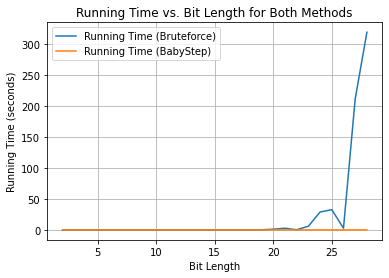

In [14]:

# Create the line plot
plt.plot(Bit_Length, Running_Time_bruteforce_list, label='Running Time (Bruteforce)')
plt.plot(Bit_Length, Running_Time_baby_step_list, label='Running Time (BabyStep)')

# Set labels for the x and y axes
plt.xlabel('Bit Length')
plt.ylabel('Running Time (seconds)')

# Add a legend (if needed)
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Running Time vs. Bit Length for Both Methods')
plt.show()


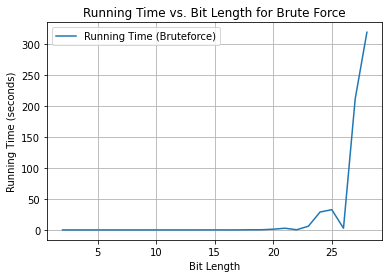

In [15]:
# Create the line plot
plt.plot(Bit_Length, Running_Time_bruteforce_list, label='Running Time (Bruteforce)')

# Set labels for the x and y axes
plt.xlabel('Bit Length')
plt.ylabel('Running Time (seconds)')

# Add a legend (if needed)
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Running Time vs. Bit Length for Brute Force')
plt.show()


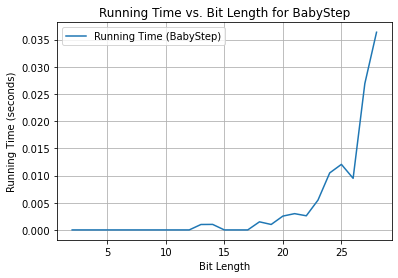

In [16]:
# Create the line plot
plt.plot(Bit_Length, Running_Time_baby_step_list, label='Running Time (BabyStep)')

# Set labels for the x and y axes
plt.xlabel('Bit Length')
plt.ylabel('Running Time (seconds)')

# Add a legend (if needed)
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Running Time vs. Bit Length for BabyStep')
plt.show()


# Part 3

Let us model an MiTM attack on DFKC which is a prominent attack on DFKC due to lack of Authentication. 
Through this way, an attacker does not have to dolve the computationally intensive DLP

In [8]:
#Prime Number is 14814703
#Primitive root is 3
import random
import math

Prime_Number=14814703
Primitive_root=3

In [9]:
# a: Alice's private key (Trying 24bits but you can try larger values)
a = random.getrandbits(24)
print(f"Alice's private key is {a}")

#b: Bob's private key
b = random.getrandbits(24)
print(f"Bob's private key is {b}")

# Utilise pow(base, exponent, modulus) function

# A: Alice's public key
A = pow(Primitive_root,a,Prime_Number)
print(f"Alice's public key is {A}")

# B: Bob's public key
B = pow(Primitive_root,b,Prime_Number)
print(f"Bob's public key is {B}")

Alice's private key is 15508780
Bob's private key is 13142056
Alice's public key is 14408204
Bob's public key is 2335135


In [11]:
#Charlie will intercept Alice's public key enroute to bob and do the same for Bob's enroute to Alice.

#First Charlie needs her own Private keys, and shes in the middle of the 2 of them so she needs to
Charlie_1_Private = random.getrandbits(24)
Charlie_2_Private = random.getrandbits(24)

#Intercept time, Charlie will create her Public keys with the public prime and root parameters
#and use these to exhange with the respective parties
Charlie_1_Public = pow(Primitive_root,Charlie_1_Private,Prime_Number)
Charlie_2_Public = pow(Primitive_root,Charlie_2_Private,Prime_Number)

# Alice and bob will receive Charlies key thinking that Alice is receiving Bobs and Bob's receiving alice. 
# But Actually Both are receiving Charlies
Shared_Charlie_Alice_key_from_Alice_POV = pow(Charlie_1_Public,a,Prime_Number)
Shared_Charlie_Bob_key_from_BOB_POV = pow(Charlie_2_Public,b,Prime_Number)

Shared_Charlie_Alice_key_from_Charlie_POV = pow(A,Charlie_1_Private,Prime_Number)
Shared_Charlie_Bob_key_from_Charlie_POV = pow(B,Charlie_2_Private,Prime_Number)

# If Shared_Charlie_Alice_key_from_Charlie_POV and Shared_Charlie_Alice_key_from_Alice_POV and vice versa is the asme, MiTM is working.
if Shared_Charlie_Alice_key_from_Alice_POV == Shared_Charlie_Alice_key_from_Charlie_POV:
    print(f"Alice's shared key with Charlie: {Shared_Charlie_Alice_key_from_Alice_POV}")
    print(f"Charlie's shared key with Alice: {Shared_Charlie_Alice_key_from_Charlie_POV}")
    print("Keys are the same, Hence showing that DFKC MiTM is working properly")
else:
    print("Keys are mismatched")
    
print("\n\n")
if Shared_Charlie_Bob_key_from_BOB_POV == Shared_Charlie_Bob_key_from_Charlie_POV:
    print(f"Bob's shared key with Charlie: {Shared_Charlie_Bob_key_from_BOB_POV}")
    print(f"Charlie's shared key with Bob: {Shared_Charlie_Bob_key_from_Charlie_POV}")
    print("Keys are the same, Hence showing that DFKC MiTM is working properly")
else:
    print("Keys are mismatched")

Alice's shared key with Charlie: 5031510
Charlie's shared key with Alice: 5031510
Keys are the same, Hence showing that DFKC MiTM is working properly



Bob's shared key with Charlie: 13809110
Charlie's shared key with Bob: 13809110
Keys are the same, Hence showing that DFKC MiTM is working properly


.<img src=attachment:Screenshot%202023-10-15%20213024.png width="600" height="300">
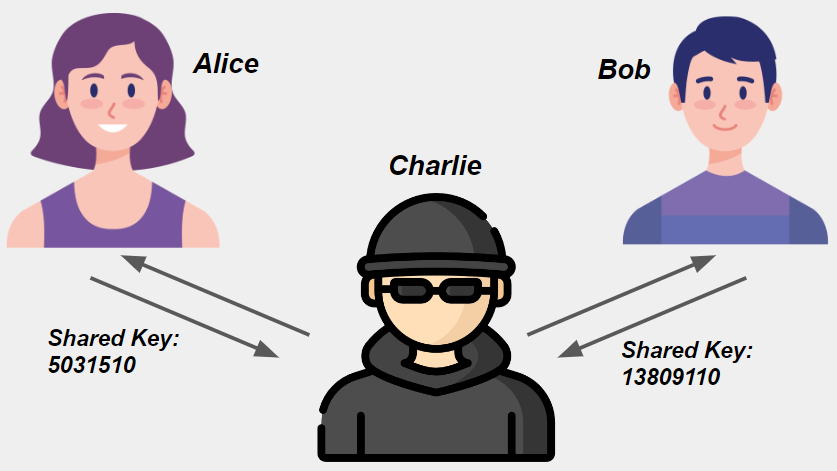

Now If Alice uses (Shared_Charlie_Alice_key_from_Alice_POV) to encrypt a message to Bob, Charlie will receive it and can decrypt it, and modify the message, etc. Charlie can then re-encrypt it using (Shared_Charlie_Bob_key_from_Charlie_POV), and send it to Bob. Best part of it all, Bob and Alice will not find out about anything that is happening whilst Charlie will have full control over the messages. This is all due to the lack of authentication during DFKC.

In [12]:

!git add "Diffie Hellman Key Exchange.ipynb"
!git commit -m "MiTM Addition"
!git push


[main d5fe466] MiTM Addition
 1 file changed, 101 insertions(+), 51 deletions(-)


To https://github.com/MIBN21/CZ4010-Applied-Crypto-Project
   95b245c..d5fe466  main -> main


SO this is what i think our 8 mins will entail

1) 
Introduction of our Project (10s)

Explanation of DFKC (1min 30s)

Say that we are using small bit lengths due to logistical issue that otherwise it will take too long to find the primitive root and break the dfkc to observe the relationship. But show the table that we know it is suppose to be 1024/2048 bits( 30 s)

Statistics display (30s)

2) Go through the part that we use open ssl to select a prime number, and explain that we use a function to obtain the smallest Primitive root of the prime number(30s)

3) Show that we obtained the private public key of Alice and Bob (10s)

4) Show that Our DFKC is working properly using the pow function (15s)

5) Show the Brute force method. (20s)

6) Explain and show the Baby Step method.(1min)

7) Show that our brute focre and the baby step gets the right answer. and show baby step is a significantly faster method.(20s)

Part 2
1) Explanation that the parameter that is of great importance in the DFKC is the prime bit lenmgth . To show that we will show the relationship between prime bit length and the running time it takes tto crack the DLP. (20s)

Generation of Primes from 2 bit to 28 bit(5s)

Just flash through the rest of the other functions until the graphin (15s)

Show the 3 graphs and explain the differences and similarities between the Baby step algo and the brute Force algo (35s)

Total time so far (6min)
